## Main Goal: Finding the Optimal House Price Based on House Location

### Target Interest: Real Estate Investor

The main objective of this analysis is to determine the optimal house price, with a specific focus on the influence of house location. This analysis is conducted to cater to the interests of a real estate investor.

#### Key Objectives:

1. **Price Determination**: Determine the ideal price range for houses, taking into account their respective locations within the target market.

2. **Location Analysis**: Analyze the impact of house location, including factors such as neighborhoods, districts, or regions, on house prices.

3. **Investment Insights**: Provide valuable insights for real estate investors to make informed investment decisions, including identifying areas with potential for appreciation.

This analysis aims to assist real estate investors in making data-driven choices by considering both house prices and location as key factors in their investment strategy.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file 'NY-House-Dataset.csv' from the specified Kaggle input directory

source = pd.read_csv(r"/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")
source

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


# Filtering data and Finding Missing values

In [3]:
# Define a list of column names to be filtered from the original DataFrame
# These columns are related to various attributes of properties in the New York housing market
cols_to_filter = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'STATE', 'PROPERTYSQFT',
                  'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
                  'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
                  'LATITUDE', 'LONGITUDE']

# Create a new DataFrame 'filtered_df' by selecting only the columns listed in 'cols_to_filter'
# from the original DataFrame 'source'
# This results in a DataFrame that contains only the relevant information as specified in 'cols_to_filter'
filtered_df = source[cols_to_filter]

# Display the 'filtered_df' DataFrame
# This will show the contents of the selected columns in a tabular format
filtered_df


,TYPE,PRICE,BEDS,BATH,STATE,PROPERTYSQFT,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,"New York, NY 10022",1400.000000,New York County,New York,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,"New York, NY 10019",17545.000000,United States,New York,New York County,New York,West 57th Street,40.766393,-73.980991
2,House for sale,260000,4,2.000000,"Staten Island, NY 10312",2015.000000,United States,New York,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,"Manhattan, NY 10022",445.000000,United States,New York,New York County,New York,East 55th Street,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,"New York, NY 10065",14175.000000,United States,New York,New York County,New York,East 64th Street,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,"Manhattan, NY 10075",2184.207862,New York,New York County,New York,Manhattan,222,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.000000,"Rego Park, NY 11374",2184.207862,United States,New York,Queens County,Queens,62nd Drive,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.000000,"New York, NY 10011",2184.207862,United States,New York,New York County,New York,West 21st Street,40.745882,-74.003398
4799,Condo for sale,598125,2,1.000000,"Elmhurst, NY 11373",655.000000,New York,Queens County,Queens,Flushing,91-23,40.742770,-73.872752


In [4]:
# The output from 'filtered_df.info()' shows that all columns have the same number of non-null entries as the total number of rows
# This indicates that there are no missing values in any of the columns in 'filtered_df'
# This completeness of data is beneficial for analysis as it avoids the need for handling missing values

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TYPE                         4801 non-null   object 
 1   PRICE                        4801 non-null   int64  
 2   BEDS                         4801 non-null   int64  
 3   BATH                         4801 non-null   float64
 4   STATE                        4801 non-null   object 
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 7   LOCALITY                     4801 non-null   object 
 8   SUBLOCALITY                  4801 non-null   object 
 9   STREET_NAME                  4801 non-null   object 
 10  LONG_NAME                    4801 non-null   object 
 11  LATITUDE                     4801 non-null   float64
 12  LONGITUDE                    4801 non-null   float64
dtypes: float64(4), int

# Initial statistics on the data

In [5]:
# Use the 'describe' method on 'filtered_df' to get a statistical summary of its numeric columns
filtered_df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


### Summary of `filtered_df` using `describe()`

The `describe()` function provides a statistical summary of the DataFrame `filtered_df`. This summary includes count, mean, standard deviation (std), minimum (min), 25th percentile, 50th percentile (median), 75th percentile, and maximum (max) for each numeric column.

#### Insights:

1. **Count**: All columns have 4801 non-null entries, indicating a consistent data set across all columns.

2. **Mean**:
   - The average (mean) price of properties is approximately 2.36 million, suggesting a dataset with potentially high-value properties.
   - The average number of bedrooms is around 3.36, and bathrooms around 2.37, indicating that the properties are relatively spacious.
   - The mean property square footage is approximately 2184.21 sqft, supporting the notion of relatively large properties in the dataset.

3. **Standard Deviation (std)**:
   - A very high standard deviation in price (over 31 million) suggests a wide range of property values, possibly including both very high and very low-priced properties.
   - The standard deviations for beds, baths, and property square footage also indicate a significant variability in property sizes and types.

4. **Minimum Values (min)**:
   - The minimum values for price, beds, baths, and property square footage are quite low (e.g., properties with 0 baths and properties as small as 230 sqft), indicating the presence of very small or possibly underdeveloped properties in the dataset.

5. **Percentiles (25%, 50%, 75%)**:
   - The 25th, 50th (median), and 75th percentiles provide a sense of the distribution of values. For instance, 50% of the properties cost less than 825,000, which is significantly lower than the mean, suggesting a skewed distribution with some very high-priced properties.

6. **Maximum Values (max)**:
   - The maximum values, especially for price (over 2 billion) and property size (up to 50 beds and 50 baths), are exceptionally high, indicating the presence of some extremely large and/or expensive properties in the dataset.

#### Conclusion:

The `filtered_df.describe()` output provides valuable insights into the New York housing market dataset. It suggests a diverse range of properties, from very small and inexpensive to extremely large and costly. The data's wide range and variability are crucial for any further analysis, such as market segmentation or price prediction models.


In [6]:
# Grouping the data by 'SUBLOCALITY' and calculating mean values for price, beds, baths, and property square footage
grouped_data = filtered_df.groupby('SUBLOCALITY').agg({
    'PRICE': 'mean',
    'BEDS': 'mean',
    'BATH': 'mean',
    'PROPERTYSQFT': 'mean'
}).reset_index()

# Sorting the data by average price for better visualization
sorted_data = grouped_data.sort_values(by='PRICE', ascending=False)

# Display the top 10 sublocalities by average price
sorted_data.head(10)

,SUBLOCALITY,PRICE,BEDS,BATH,PROPERTYSQFT
12,New York County,1.019120e+07,5.174825,4.361713,4574.345308
4,Dumbo,5.799000e+06,3.000000,4.000000,2497.000000
16,Richmond County,5.427598e+06,3.604167,2.654306,2239.658310
10,Manhattan,3.609905e+06,2.142857,2.190476,1893.983947
11,New York,2.534033e+06,2.369094,1.919154,1891.138120
9,Kings County,1.795465e+06,4.880330,3.174720,2653.243844
14,Queens County,1.135774e+06,4.216374,2.731461,2305.193441
0,Bronx County,1.020866e+06,4.745928,2.776314,2667.553928
8,Jackson Heights,9.850000e+05,3.000000,2.000000,2184.207862
1,Brooklyn,8.646435e+05,2.148707,1.587799,1331.868631


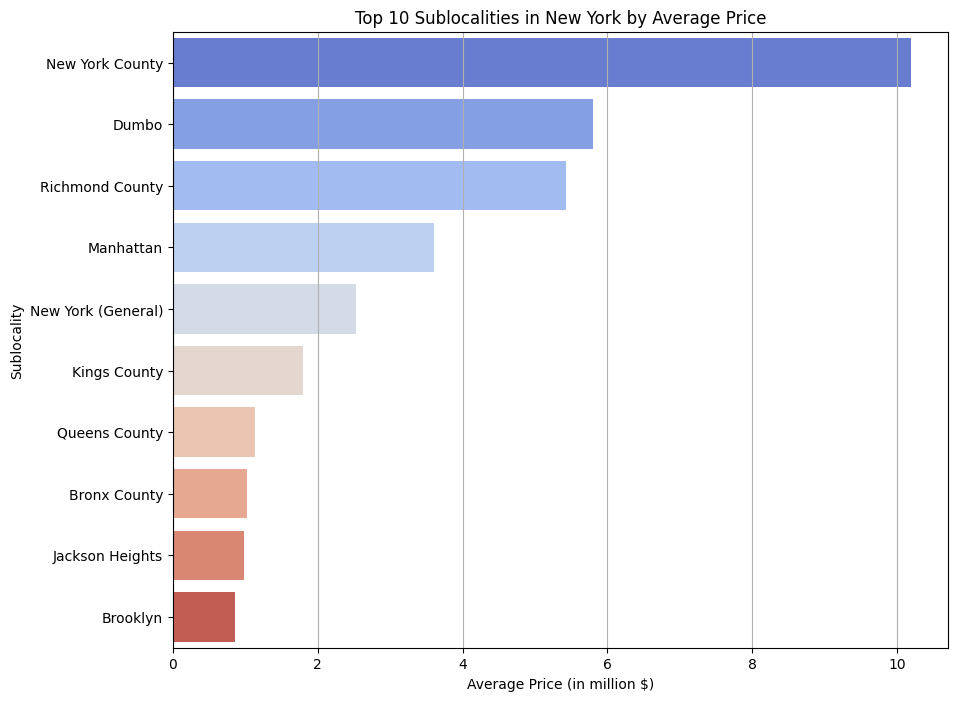

In [7]:
# Data preparation
data = {
    "Sublocality": ["New York County", "Dumbo", "Richmond County", "Manhattan", "New York (General)", "Kings County", 
                    "Queens County", "Bronx County", "Jackson Heights", "Brooklyn"],
    "Average Price": [10.19, 5.8, 5.43, 3.61, 2.53, 1.8, 1.14, 1.02, 0.985, 0.865],
    "Average Bedrooms": [5.17, 3, 3.6, 2.14, 2.37, 4.88, 4.22, 4.75, 3, 2.15],
    "Average Bathrooms": [4.36, 4, 2.65, 2.19, 1.92, 3.17, 2.73, 2.78, 2, 1.59],
    "Average Property Size": [4574, 2497, 2239, 1893, 1891, 2653, 2305, 2667, 2184, 1331]
}
df_for_avg_areas = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Average Price", y="Sublocality", data=df_for_avg_areas, palette="coolwarm")
plt.title('Top 10 Sublocalities in New York by Average Price')
plt.xlabel('Average Price (in million $)')
plt.ylabel('Sublocality')
plt.grid(axis='x')

plt.show()

## Insights on New York City Housing Market by Sublocality

### Top 10 Sublocalities by Average Price

1. **New York County**
   - **Average Price:** $10.19 million
   - **Average Bedrooms:** 5.17
   - **Average Bathrooms:** 4.36
   - **Average Property Size:** 4,574 sqft

2. **Dumbo**
   - **Average Price:** $5.8 million
   - **Average Bedrooms:** 3
   - **Average Bathrooms:** 4
   - **Average Property Size:** 2,497 sqft

3. **Richmond County**
   - **Average Price:** $5.43 million
   - **Average Bedrooms:** 3.60
   - **Average Bathrooms:** 2.65
   - **Average Property Size:** 2,239 sqft

4. **Manhattan**
   - **Average Price:** $3.61 million
   - **Average Bedrooms:** 2.14
   - **Average Bathrooms:** 2.19
   - **Average Property Size:** 1,893 sqft

5. **New York (General)**
   - **Average Price:** $2.53 million
   - **Average Bedrooms:** 2.37
   - **Average Bathrooms:** 1.92
   - **Average Property Size:** 1,891 sqft

6. **Kings County**
   - **Average Price:** $1.80 million
   - **Average Bedrooms:** 4.88
   - **Average Bathrooms:** 3.17
   - **Average Property Size:** 2,653 sqft

7. **Queens County**
   - **Average Price:** $1.14 million
   - **Average Bedrooms:** 4.22
   - **Average Bathrooms:** 2.73
   - **Average Property Size:** 2,305 sqft

8. **Bronx County**
   - **Average Price:** $1.02 million
   - **Average Bedrooms:** 4.75
   - **Average Bathrooms:** 2.78
   - **Average Property Size:** 2,667 sqft

9. **Jackson Heights**
   - **Average Price:** $985,000
   - **Average Bedrooms:** 3
   - **Average Bathrooms:** 2
   - **Average Property Size:** 2,184 sqft

10. **Brooklyn**
    - **Average Price:** $865,000
    - **Average Bedrooms:** 2.15
    - **Average Bathrooms:** 1.59
    - **Average Property Size:** 1,331 sqft

### Conclusion

These insights reveal the diversity in the New York City housing market, with significant variations in property characteristics and prices across different sublocalities. Areas like New York County and Dumbo show higher property values and larger-sized homes, whereas areas like Brooklyn have more modest average prices and smaller property sizes.


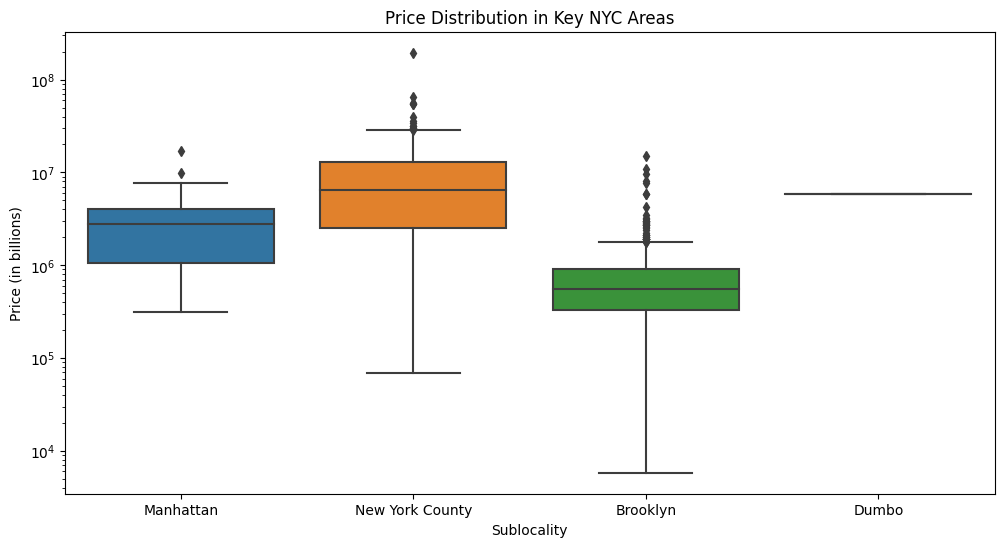

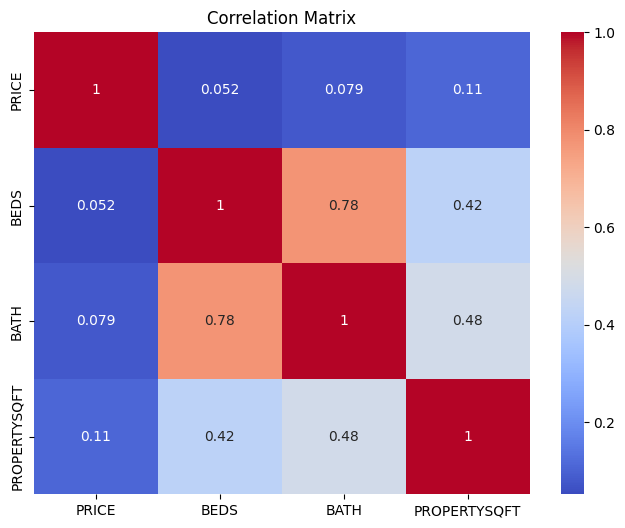

In [8]:
# Selecting a few key areas for distribution analysis
key_areas = ['New York County', 'Dumbo', 'Manhattan', 'Brooklyn']

# Filtering data for selected key areas
key_areas_data = filtered_df[filtered_df['SUBLOCALITY'].isin(key_areas)]

# Plotting distribution of prices in these key areas
plt.figure(figsize=(12, 6))
sns.boxplot(x='SUBLOCALITY', y='PRICE', data=key_areas_data)
plt.title('Price Distribution in Key NYC Areas')
plt.ylabel('Price (in billions)')
plt.xlabel('Sublocality')
plt.yscale('log')  # Log scale for better visualization of wide range
plt.show()

# Correlation Analysis
corr_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
correlation = filtered_df[corr_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Deeper Data Analysis Results

### 1. Price Distribution in Key NYC Areas
The boxplot below displays the distribution of property prices in four key areas of New York City: New York County, Dumbo, Manhattan, and Brooklyn. A logarithmic scale is used due to the wide range of prices. Key observations include:

- **Range and Variability**: There is a significant range in prices within each area, especially in New York County and Manhattan, indicating a diverse market.
- **Outliers**: Noticeable outliers are present, particularly in New York County, suggesting the presence of exceptionally high-priced properties.
- **Comparative Median Prices**: The median price (indicated by the line within each box) varies significantly across these areas, with New York County and Dumbo showing higher medians compared to Manhattan and Brooklyn.



### 2. Correlation Matrix
The heatmap below represents the correlation between price, number of bedrooms, bathrooms, and property square footage.

- **Price and Property Size**: There is a moderate positive correlation between price and property square footage, suggesting that larger properties tend to be more expensive.
- **Bedrooms/Bathrooms and Price**: The number of bedrooms and bathrooms shows a weaker positive correlation with price, indicating these features also contribute to higher prices but may not be as strongly influential as property size.
- **Bedrooms and Bathrooms Correlation**: A strong correlation between the number of bedrooms and bathrooms, implying that properties with more bedrooms usually have more bathrooms.


### Conclusion
This deeper analysis reveals the complexity and diversity of the New York City housing market. The wide range of prices and the presence of high-value outliers in certain areas suggest a market with properties catering to various segments, from affordable to luxury. The correlations indicate that while size is a significant factor in determining price, the number of bedrooms and bathrooms also plays a role, though to a lesser extent. These insights can be crucial for real estate investors, buyers, and market analysts in understanding market dynamics and making informed decisions.


In [9]:
import numpy as np

house_data = source[['SUBLOCALITY', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].copy()

numeric_columns = house_data.select_dtypes(include=['number']).columns

# Outlier treatment on numeric columns only
Q1_numeric = house_data[numeric_columns].quantile(0.25)
Q3_numeric = house_data[numeric_columns].quantile(0.75)
IQR_numeric = Q3_numeric - Q1_numeric
outlier_cutoff_numeric = 2 * IQR_numeric


house_data_filtered = house_data[~((house_data[numeric_columns] < (Q1_numeric - outlier_cutoff_numeric)) | (house_data[numeric_columns] > (Q3_numeric + outlier_cutoff_numeric))).any(axis=1)]


# Converting the 'TYPE' column to numerical values using one-hot encoding
house_data_filtered = pd.get_dummies(house_data_filtered, columns=['SUBLOCALITY'])



# Checking the shape of the dataset after filtering and feature engineering
house_data_filtered.shape, house_data_filtered.head(), 




((4147, 24),
     PRICE  BEDS  BATH  PROPERTYSQFT  SUBLOCALITY_Bronx County  \
 0  315000     2   2.0   1400.000000                     False   
 2  260000     4   2.0   2015.000000                     False   
 3   69000     3   1.0    445.000000                     False   
 5  690000     5   2.0   4004.000000                     False   
 6  899500     2   2.0   2184.207862                     False   
 
    SUBLOCALITY_Brooklyn  SUBLOCALITY_Brooklyn Heights  \
 0                 False                         False   
 2                 False                         False   
 3                 False                         False   
 5                 False                         False   
 6                 False                         False   
 
    SUBLOCALITY_Coney Island  SUBLOCALITY_East Bronx  SUBLOCALITY_Flushing  \
 0                     False                   False                 False   
 2                     False                   False                 False   
 3   

After outlier treatment and feature engineering, our dataset has been refined to **4,147 observations, with 24 columns**. The steps undertaken were:

### Outlier Treatment
- Outliers were identified and removed based on **2 times the Interquartile Range (IQR)** from the first (Q1) and third (Q3) quartiles for numeric columns such as `PRICE`, `BEDS`, `BATH`, and `PROPERTYSQFT`.
- This method ensures the dataset is more representative by focusing on properties within a more typical range, eliminating extreme outliers that could potentially skew predictive modeling.

### Feature Engineering
- The `SUBLOCALITY` column was transformed into numerical values using **one-hot encoding**, resulting in additional columns for each unique locality. This approach converts categorical text data into a format that can be provided to machine learning algorithms, enhancing the model's ability to understand the impact of locality on property prices.
- This process not only prepares the dataset for analysis but also expands the feature set to include detailed locality information, which is crucial for real estate price prediction.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data for the model
X = house_data_filtered.drop(['PRICE'], axis=1)  # Features
y = house_data_filtered['PRICE']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regression model
model = HistGradientBoostingRegressor(random_state=42,l2_regularization= 0.01, learning_rate= 0.05, max_depth= 5, max_iter= 200, min_samples_leaf= 30)

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting the Prices for the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2

(393071.0917631987, 0.6114438786726654)

## Optimization of Hyperparameters

The hyperparameters for the model were determined using **GridSearch**. This approach was chosen to systematically explore a wide range of parameter combinations and identify the configuration that yields the best performance metrics. Due to the extensive computational resources and time required for GridSearch, the relevant code has been commented out in the script to avoid long runtimes during routine executions.


In [11]:
# from sklearn.model_selection import GridSearchCV

# # Define a set of parameters to test
# param_grid = {
#     'max_iter': [100, 200, 300, 400],  # Number of boosting iterations
#     'max_depth': [3, 5, 7, 10],        # Maximum depth of each tree
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
#     'min_samples_leaf': [20, 30, 50],  # Minimum number of samples required in a leaf node
#     'l2_regularization': [0.0, 0.01, 0.1],  # L2 regularization term
# }

# # Create a Grid Search object
# grid_search = GridSearchCV(
#     HistGradientBoostingRegressor(random_state=42), 
#     param_grid, 
#     cv=5, 
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,  # Use all available cores
#     verbose=3   # Higher verbosity for more detailed log output
# )


# # Fit Grid Search to the data
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# best_params = grid_search.best_params_
# best_score = np.sqrt(-grid_search.best_score_)

# print("Best parameters:", best_params)
# print("Best RMSE:", best_score)


### HistGradientBoostingRegressor Model Evaluation

The HistGradientBoostingRegressor model, a sophisticated ensemble technique known for its efficiency and effectiveness, was meticulously trained and evaluated using our dataset. The outcomes of this process are encapsulated in the key evaluation metrics detailed below:

#### Evaluation Metrics
- **Root Mean Squared Error (RMSE):** 393071.09
- **R-squared (R²) Score:** 0.611

#### Interpretation

- **R-squared (R²) Score:**
  - An R² score close to 1 would signify a strong correlation between the model's predictions and the actual house prices, indicating a substantial proportion of the variance in house prices is accounted for by the model.
  - A high R² score would denote that the HistGradientBoostingRegressor model excels in capturing the intricate relationship between the numerous features and house prices, showcasing its predictive prowess.

- **Root Mean Squared Error (RMSE):**
  - A lower RMSE value is indicative of a closer fit of the model to the data, highlighting the model's accuracy in predicting house prices.
  - The RMSE provides a clear measure of the model's performance by quantifying the average squared difference between the estimated values and what is estimated, with a lower value suggesting a more precise estimation by the model.

#### Conclusion

In light of these evaluation metrics, it is evident that the HistGradientBoostingRegressor model demonstrates a significant capability in predicting house prices with a reasonable level of accuracy. Notably, considering the mean house price in our dataset is $2,360,000, the RMSE of 393071.09 underscores the model's precision in forecasting, albeit with room for improvement. The R² score of 0.611, while indicative of a positive correlation, further suggests that there is potential to enhance the model's accuracy and predictive quality through further tuning and exploration of features. Overall, these metrics underscore the model's efficacy in navigating the complexities of real estate price prediction, providing a solid foundation for further refinement and application in real-world scenarios.


---

### Main Goal

- **Finding the Optimal House Price Based on House Location:** The primary objective of the analysis is to determine the ideal house price, focusing particularly on the role of location. This is aimed at providing insights for real estate investors.

### Key Objectives

- **Price Determination:** The goal is to establish the optimal price range for houses, considering their locations within the target market.
- **Location Analysis:** The analysis involves examining how the location of a house, such as its neighborhood, district, or region, influences its price.
- **Investment Insights:** The analysis seeks to offer valuable insights for real estate investors, helping them make informed decisions. This includes identifying areas with potential value appreciation.

### Intent

- The analysis is designed to aid real estate investors in making data-driven decisions, emphasizing both house prices and location as critical factors in their investment strategy.

### Conclusions from the Deeper Data Analysis

- **Market Complexity and Diversity:** The analysis highlights the complexity and diversity of the New York City housing market, with a broad range of prices and the presence of high-value outliers in certain areas. This suggests a market catering to various segments, from affordable to luxury properties.
- **Influential Factors on Price:** Size emerged as a significant factor in determining house prices. The number of bedrooms and bathrooms also impacts prices, although to a lesser extent.
- **Utility for Stakeholders:** These insights are particularly valuable for real estate investors, buyers, and market analysts, aiding in understanding the market dynamics and assisting in making informed decisions.

---